### Summary of Project

**Objective:**
The Project involves using the K-Means clustering algorithm to analyze patterns in greenhouse gas (GHG) emissions from companies in California for the year 2021. The analysis focuses on emissions of Carbon Dioxide (CO2) and Methane (CH4) using unsupervised learning techniques.

**Data Preparation:**
1. **Dataset:** ca_emissions_data_2021_v2.csv
2. **Source:** EPA's FLIGHT tool, filtered for the year 2021 and California companies.
3. **GHG Focus:** CO2 and CH4 emissions, measured in metric tons.

**Steps:**

1. **Loading and Cleaning Data:**
   - Load the emissions data from the CSV file.
   - Remove any rows with NA values.

2. **Selecting and Normalizing Data:**
   - Select CO2 and CH4 columns for clustering.
   - Normalize the selected columns to ensure they are on the same scale.

3. **Determining Optimal Number of Clusters:**
   - Perform K-Means clustering for a range of cluster numbers (k=1 to 10).
   - Plot the elbow curve to visualize the WSS for each k and determine the optimal number of clusters.

4. **Performing K-Means Clustering:**
   - Use the optimal number of clusters identified from the elbow curve.
   - Assign cluster labels to each company in the dataset.

5. **Visualizing Clustering Results:**
   - Use visualization libraries (ggpubr, ggrepel) to create a scatter plot showing the clustering results.
   - Label the biggest companies in each cluster based on CO2 emissions.


**Questions to Answer:**
1. How many clusters were optimal?
2. Who were the biggest emitters in each cluster?
3. Can you identify common characteristics among the companies/facilities in each cluster?


# Loading Packages

In [1]:
import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Reading Data

In [2]:
data = pd.read_csv('/Users/jonathantrejo/Desktop/ML in Finance/ca_emissions_data_2021_v2.csv')
data

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,CO2,CH4 (Methane)
0,2021.0,AES Alamitos,1001444.0,690 N STUDEBAKER ROAD,33.768800,-118.10090,LONG BEACH,Los Angeles,CA,90803.0,AES CORP (100%),1510858.0,701.0
1,2021.0,AES Huntington Beach,1001447.0,21730 NEWLAND ST,33.643600,-117.97880,HUNTINGTON BEACH,Orange,CA,92646.0,AES CORP (100%),1499800.0,696.0
2,2021.0,AES Redondo Beach,1001450.0,1100 N HARBOR DRIVE,33.850400,-118.39500,REDONDO BEACH,Los Angeles,CA,90277.0,AES CORP (100%),192432.0,89.0
3,2021.0,ANHEUSER BUSCH INC. - L.A. BREWERY,1002867.0,15800 ROSCOE BOULEVARD,34.221320,-118.48044,VAN NUYS,LOS ANGELES COUNTY,CA,91406.0,ANHEUSER-BUSCH COS LLC (100%),31207.0,23.0
4,2021.0,ANTELOPE VALLEY RECYCLING AND DISPOSAL FACILITY,1007710.0,1200 WEST CITY RANCH ROAD,34.569700,-118.15340,PALMDALE,LOS ANGELES COUNTY,CA,93551.0,WASTE MANAGEMENT INC (100%),112.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2021.0,Woodland Generation Station,1001107.0,920 WOODLAND AVE,37.652800,-121.01720,MODESTO,Stanislaus,CA,95351.0,MODESTO IRRIGATION DISTRICT INC (100%),173771.0,81.0
282,2021.0,Yuba City Cogeneration,1004577.0,873 N. Walton Ave,39.137472,-121.64391,Yuba City,SUTTER COUNTY,CA,95993.0,WELLHEAD ELECTRIC CO (100%),29977.0,14.0
283,2021.0,Yuba City Energy Center,1000123.0,875 NORTH WALTON AVE,39.136500,-121.63970,YUBA CITY,Sutter,CA,95993.0,VOLT PARENT LP (100%),53677.0,25.0
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preparation

In [3]:
data.isna().sum()

REPORTING YEAR       2
FACILITY NAME        2
GHGRP ID             2
REPORTED ADDRESS     4
LATITUDE             2
LONGITUDE            2
CITY NAME            2
COUNTY NAME          7
STATE                2
ZIP CODE             2
PARENT COMPANIES     3
CO2                  7
CH4 (Methane)       20
dtype: int64

In [4]:
data = data.dropna()
data

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,CO2,CH4 (Methane)
0,2021.0,AES Alamitos,1001444.0,690 N STUDEBAKER ROAD,33.768800,-118.100900,LONG BEACH,Los Angeles,CA,90803.0,AES CORP (100%),1510858.0,701.0
1,2021.0,AES Huntington Beach,1001447.0,21730 NEWLAND ST,33.643600,-117.978800,HUNTINGTON BEACH,Orange,CA,92646.0,AES CORP (100%),1499800.0,696.0
2,2021.0,AES Redondo Beach,1001450.0,1100 N HARBOR DRIVE,33.850400,-118.395000,REDONDO BEACH,Los Angeles,CA,90277.0,AES CORP (100%),192432.0,89.0
3,2021.0,ANHEUSER BUSCH INC. - L.A. BREWERY,1002867.0,15800 ROSCOE BOULEVARD,34.221320,-118.480440,VAN NUYS,LOS ANGELES COUNTY,CA,91406.0,ANHEUSER-BUSCH COS LLC (100%),31207.0,23.0
7,2021.0,Aera Energy 25 Hill,1002316.0,29235 Highway 33,35.092330,-119.407371,Maricopa,KERN COUNTY,CA,93252.0,SHELL PETROLEUM INC (51.8%); EXXON MOBIL CORP ...,73817.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2021.0,"Wild Goose Storage, LLC",1011526.0,2780 West Liberty Rd.,39.347640,-121.816280,Gridley,BUTTE COUNTY,CA,95948.0,ROCKPOINT GAS STORAGE PARTNERS LP (100%),23864.0,11.0
280,2021.0,Windset Farms,1011469.0,1650 Black Road,34.926880,-120.481590,Santa Maria,SANTA BARBARA COUNTY,CA,93458.0,WINDSET FARMS INC (100%),34059.0,16.0
281,2021.0,Woodland Generation Station,1001107.0,920 WOODLAND AVE,37.652800,-121.017200,MODESTO,Stanislaus,CA,95351.0,MODESTO IRRIGATION DISTRICT INC (100%),173771.0,81.0
282,2021.0,Yuba City Cogeneration,1004577.0,873 N. Walton Ave,39.137472,-121.643910,Yuba City,SUTTER COUNTY,CA,95993.0,WELLHEAD ELECTRIC CO (100%),29977.0,14.0


In [5]:
data.isna().sum()

REPORTING YEAR      0
FACILITY NAME       0
GHGRP ID            0
REPORTED ADDRESS    0
LATITUDE            0
LONGITUDE           0
CITY NAME           0
COUNTY NAME         0
STATE               0
ZIP CODE            0
PARENT COMPANIES    0
CO2                 0
CH4 (Methane)       0
dtype: int64

# Select and Normalize Data

In [6]:
X = data[['CO2', 'CH4 (Methane)']]
X = (X - X.mean()) / X.std()
print(X.head(5))

        CO2  CH4 (Methane)
0  2.514316       0.986804
1  2.492365       0.977187
2 -0.102855      -0.190418
3 -0.422898      -0.317373
7 -0.338314      -0.294290


# Determining Optimal Number of Clusters:

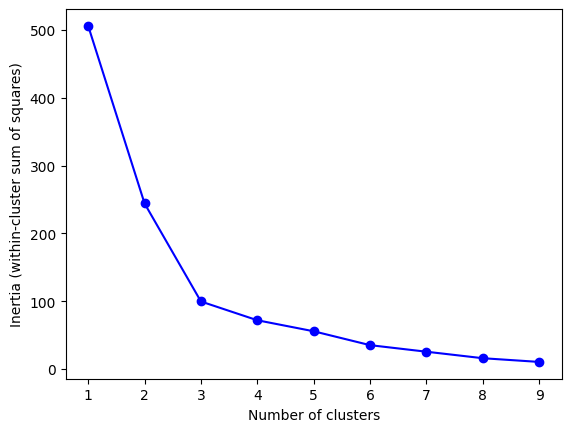

In [7]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

# Performing K-Means Clustering:

In [8]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=4 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=4 is 78.93075972741006
cluster centers:  [[-0.35262552 -0.29663138]
 [ 2.20560303  1.56127177]
 [ 3.76740508  5.78302374]
 [ 0.92121663  0.37145573]]
cluster labels:  [1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 2 2 0 0 3 0 0 0 0 1 0 0 3 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 3 0 0 0 0 0 3 0 0 0
 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 1 0 0 0 0 0 0 0 0 0 3 0 1 0 3 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 3 0 2 0 0 2 0 0 0 0 3 0 1
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 3 0 0 0 0 0]


# Visualizing Clustering Results:

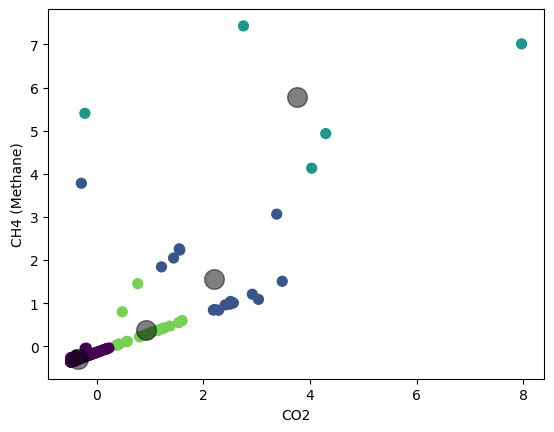

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1)]
labels = ['CO2', 'CH4 (Methane)']

for i in range(len(figs)):
    fig = plt.figure(i)
    x_index, y_index = figs[i]
    plt.scatter(X.iloc[:, x_index], X.iloc[:, y_index], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, x_index], centers[:, y_index], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[x_index])
    plt.ylabel(labels[y_index])

plt.show()


In [11]:
result = pd.DataFrame({'FACILITY NAME': data['FACILITY NAME'], 'CITY NAME': data['CITY NAME'], 'Label': y})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(result.sort_values('Label'))


                                         FACILITY NAME  \
144                              Loma Linda University   
173                                New-Indy Oxnard LLC   
174                    Newport Fab LLC (dba TowerJazz)   
175                           Niland Gas Turbine Plant   
176                    Northrop Grumman Marine Systems   
177                                   OLS ENERGY CHINO   
178                OWENS-BROCKWAY GLASS CONTAINER INC.   
179      OWENS-BROCKWAY GLASS CONTAINER INC. PLANT #23   
180                                Olam West Coast Inc   
181                                Olam West Coast Inc   
182                                Olam West Coast Inc   
183                               Orange Grove Project   
172                              New-Indy Ontario, LLC   
184                            Ormond Beach Power, LLC   
190                    PG&E DELEVAN COMPRESSOR STATION   
192                     PG&E GERBER COMPRESSOR STATION   
193           

In [12]:
result

,FACILITY NAME,CITY NAME,Label
0,AES Alamitos,LONG BEACH,1
1,AES Huntington Beach,HUNTINGTON BEACH,1
2,AES Redondo Beach,REDONDO BEACH,0
3,ANHEUSER BUSCH INC. - L.A. BREWERY,VAN NUYS,0
7,Aera Energy 25 Hill,Maricopa,0
...,...,...,...
279,"Wild Goose Storage, LLC",Gridley,0
280,Windset Farms,Santa Maria,0
281,Woodland Generation Station,MODESTO,0
282,Yuba City Cogeneration,Yuba City,0


In [13]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]  

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.843938672354497
For n_clusters = 3 The average silhouette_score is : 0.8311936395825553
For n_clusters = 4 The average silhouette_score is : 0.7956815736997379
For n_clusters = 5 The average silhouette_score is : 0.8000921220763836
For n_clusters = 6 The average silhouette_score is : 0.8062552467340485


In [14]:
k = 4
cluster_centers = kmeans.cluster_centers_
biggest_emitters = []
for i in range(k):
    cluster_indices = np.where(cluster_labels == i)[0]
    max_emitter_index = cluster_indices[np.argmax(X.iloc[cluster_indices].sum(axis=1))]  # Assuming sum of CO2 and CH4 represents emission
    biggest_emitters.append((max_emitter_index, cluster_labels[max_emitter_index]))

In [15]:
biggest_emitters

[(226, 0), (149, 1), (211, 2), (183, 3)]

In [16]:
biggest_emitters = [(226, 0), (149, 1), (211, 2), (183, 3)]  # Results you provided

for index, cluster_label in biggest_emitters:
    data_point = data.iloc[index]
    print("Index:", index, "Cluster Label:", cluster_label)
    print("Data Point:")
    print(data_point)
    print("\n")


Index: 226 Cluster Label: 0
Data Point:
REPORTING YEAR                                2021.0
FACILITY NAME       Tracy Combined Cycle Power Plant
GHGRP ID                                   1007312.0
REPORTED ADDRESS                14950 W SCHULTE ROAD
LATITUDE                                     37.7107
LONGITUDE                                  -121.4906
CITY NAME                                      TRACY
COUNTY NAME                              San Joaquin
STATE                                             CA
ZIP CODE                                     95377.0
PARENT COMPANIES       MIDDLE RIVER POWER LLC (100%)
CO2                                         362302.0
CH4 (Methane)                                  168.0
Name: 254, dtype: object


Index: 149 Cluster Label: 1
Data Point:
REPORTING YEAR                    2021.0
FACILITY NAME               Moss Landing
GHGRP ID                       1001440.0
REPORTED ADDRESS    7301 State Highway 1
LATITUDE                         36.8042

Descriptive Statistics for Each Cluster:
              REPORTING YEAR                                               \
                       count    mean  std     min     25%     50%     75%   
Cluster Label                                                               
0                      212.0  2021.0  0.0  2021.0  2021.0  2021.0  2021.0   
1                       17.0  2021.0  0.0  2021.0  2021.0  2021.0  2021.0   
2                        5.0  2021.0  0.0  2021.0  2021.0  2021.0  2021.0   
3                       20.0  2021.0  0.0  2021.0  2021.0  2021.0  2021.0   

                      GHGRP ID                ...         CO2             \
                  max    count          mean  ...         75%        max   
Cluster Label                                 ...                          
0              2021.0    212.0  1.005027e+06  ...    69031.75   362302.0   
1              2021.0     17.0  1.003591e+06  ...  1536262.00  1998178.0   
2              2021.0      5.0  1.00537

/var/folders/kn/0zx9skp16fx_yqhnb4m6str40000gn/T/ipykernel_3450/2065684514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster Label'] = y


<Figure size 1000x600 with 0 Axes>

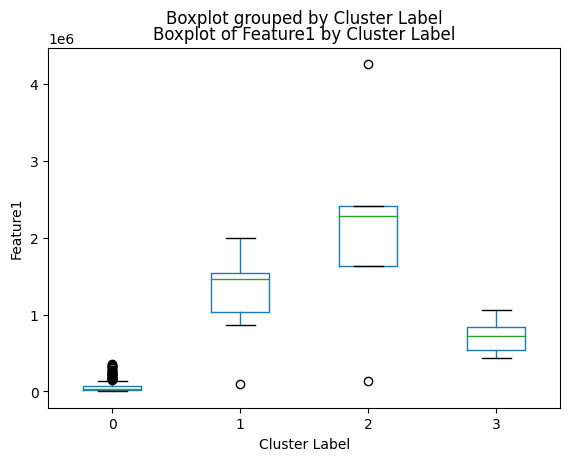

In [18]:
import pandas as pd

data['Cluster Label'] = y


cluster_statistics = data.groupby('Cluster Label').describe()


print("Descriptive Statistics for Each Cluster:")
print(cluster_statistics)


import matplotlib.pyplot as plt

# Example: Boxplot of a feature 'Feature1' by cluster label
plt.figure(figsize=(10, 6))
data.boxplot(column='CO2', by='Cluster Label', grid=False)
plt.title('Boxplot of Feature1 by Cluster Label')
plt.xlabel('Cluster Label')
plt.ylabel('Feature1')
plt.show()


<Figure size 1000x600 with 0 Axes>

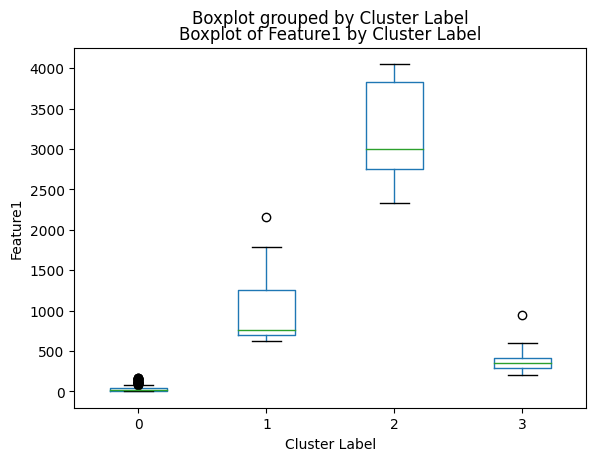

In [19]:
plt.figure(figsize=(10, 6))
data.boxplot(column='CH4 (Methane)', by='Cluster Label', grid=False)
plt.title('Boxplot of Feature1 by Cluster Label')
plt.xlabel('Cluster Label')
plt.ylabel('Feature1')
plt.show()

4 clusters were the optimal number of clusters.

The biggest emmitters of CO2 and CH4 are: Tracy Combined Cylve Power Plant, Moss Landing, Searles Valley Mineral, Phillips 66 Los Angeles Refinery - Carson Plant.

Overall Cluster 3 have both the highest emmission of CO2 and CH4 when compared to the rest of the clusters. Cluster 1 has both the lower emmission of CO2 and CH4 when to compared to the rest of the cluters. 
